#   **CLASSİFİCATİON WİTH ANN**


 **import libraries**
**************************************************************************************************************
**1- import pandas as pd**

Pandas is a powerful library for data manipulation and analysis, especially with tabular data (DataFrames). It provides tools for loading, cleaning, filtering, and analyzing data, commonly from CSV and Excel files.

pd is a shorthand used for convenience when accessing its functions
**************************************************************************************************************

**2- import numpy as np**

NumPy is essential for numerical computing, providing support for large multi-dimensional arrays and matrices. It facilitates mathematical operations, linear algebra, and vector manipulations.

np serves as an abbreviation for quicker access to its functionalities
**************************************************************************************************************
**3- import os**

The OS module allows interaction with the operating system, enabling file and directory management tasks, such as checking file existence and navigating directories.










In [36]:
import pandas as pd 
import numpy as np
import os 


1- **label:** Creates an empty list to store the class labels of the images.

  **path:** Creates an empty list to store the file paths of the images.

   *label = []
    path = []*

************************************************************************************************************
2- **fish_dir:** Specifies the path to the directory containing the fish dataset.

   os.walk(): Used to navigate through the subdirectories and files in the specified directory.

   Filters for image files with a **.png** extension and excludes files from the GT (Ground Truth) directory.
*************************************************************************************************************

3- Adds the label (directory name) and the file path of the current image to their respective lists.


  *label.append(os.path.split(dir_name)[-1])*

  *path.append(os.path.join(dir_name,filename))*
***********************************************************************************************************

4- **data:** Creates a pandas DataFrame with two columns: **path** and **label**, organizing the image paths and their      corresponding labels neatly.

  *data = pd.DataFrame(columns=['path','label'])*

  *data['path'] = path*

  *data['label'] = label*



In [37]:
label = []
path = []
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1]=='.png':
            if dir_name.split()[-1]!='GT':
                label.append(os.path.split(dir_name)[-1])
                path.append(os.path.join(dir_name,filename))

data = pd.DataFrame(columns=['path','label'])
data['path']=path
data['label']=label



**data.head():**   Provides a quick snapshot of the first few rows of the DataFrame, allowing you to see the data structure at a glance

In [38]:
data.head()

path            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel

**data.tail():**  Provides a quick look at the last few entries in the DataFrame, allowing you to see how the dataset concludes.

In [39]:
data.tail()

path          label
8995  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Red Sea Bream
8996  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Red Sea Bream
8997  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Red Sea Bream
8998  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Red Sea Bream
8999  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Red Sea Bream

**data.info():** The method prints information about the DataFrame.


**data.describe():** The method returns description of the data in the DataFrame

In [40]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB
None
                                                     path            label
count                                                9000             9000
unique                                               9000                9
top     /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
freq                                                    1             1000


**data.isnull():** The method returns a DataFrame object where all the values are replaced with a Boolean value True for NULL values, and otherwise False.

In [41]:
print(data.isnull().sum())


path     0
label    0
dtype: int64


**import matplotlib.pyplot as plt:** This imports the pyplot module from the Matplotlib library, which allows for data visualization.

**data['label'].value_counts():** This counts the occurrences of each class (fish species) in the label column. It shows the frequency of each class.

**.plot(kind='bar'):** This plots the class distribution as a bar chart.

**plt.title('Class Distribution'):** This adds a title to the plot.

**plt.xlabel('Class'):** This labels the x-axis with the class names (fish species).

**plt.ylabel('Frequency'):** This labels the y-axis with the frequency counts.

**plt.show():** This displays the plot on the screen.

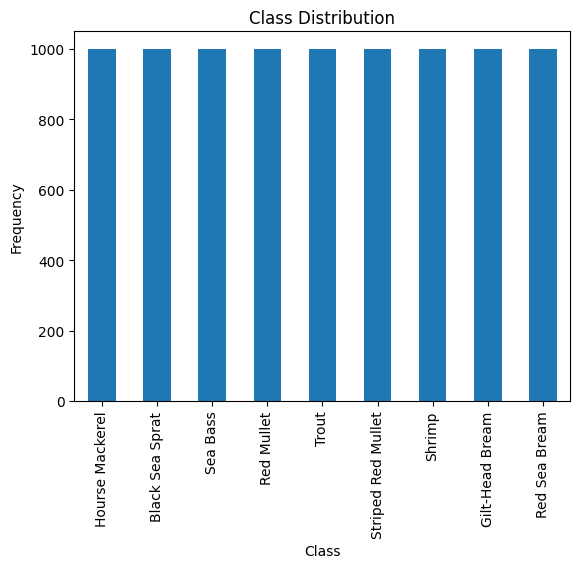

In [42]:
import matplotlib.pyplot as plt


data['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


**import cv2:** This imports the OpenCV library for image processing.

**import matplotlib.pyplot as plt:** This imports the pyplot module from Matplotlib for creating visualizations.
************************************************************************************************************************

**samples_per_class = 3:** This sets the number of sample images to display for each class (in this case, 3 images).

**classes = data['label'].unique():** This retrieves the unique class labels from the label column of the DataFrame.

**n_classes = len(classes):** This calculates the number of classes (assumed to be 9 based on your dataset).

**cols = samples_per_class:** Sets the number of columns in the subplot grid to the defined samples_per_class.

**rows = n_classes:** Sets the number of rows to the number of classes.

**fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5)):** This creates a grid of subplots with the specified number of rows and columns and sets the figure size.

**axes = axes.flatten():** This flattens the 2D array of axes into a 1D array for easier indexing.
************************************************************************************************************************
**sample_images = data[data['label'] == class_name]['path'].sample(...):** This randomly selects sample image paths for the current class, ensuring that the number of samples does not exceed the available images.

**img = cv2.imread(img_path):** Reads the image from the specified path using OpenCV.

**img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB):** Converts the image color format from BGR (OpenCV default) to RGB (for correct color representation in Matplotlib).

**axes[i * cols + j].imshow(img):** Displays the image in the appropriate subplot.

**axes[i * cols + j].set_title(class_name):** Sets the title of the subplot to the class name.

**axes[i * cols + j].axis('off'):** Hides the axis for a cleaner look.
************************************************************************************************************************
**plt.tight_layout():** Adjusts the subplot parameters to give specified padding, preventing overlap.

**plt.show():** Displays the final plot with the sampled images.



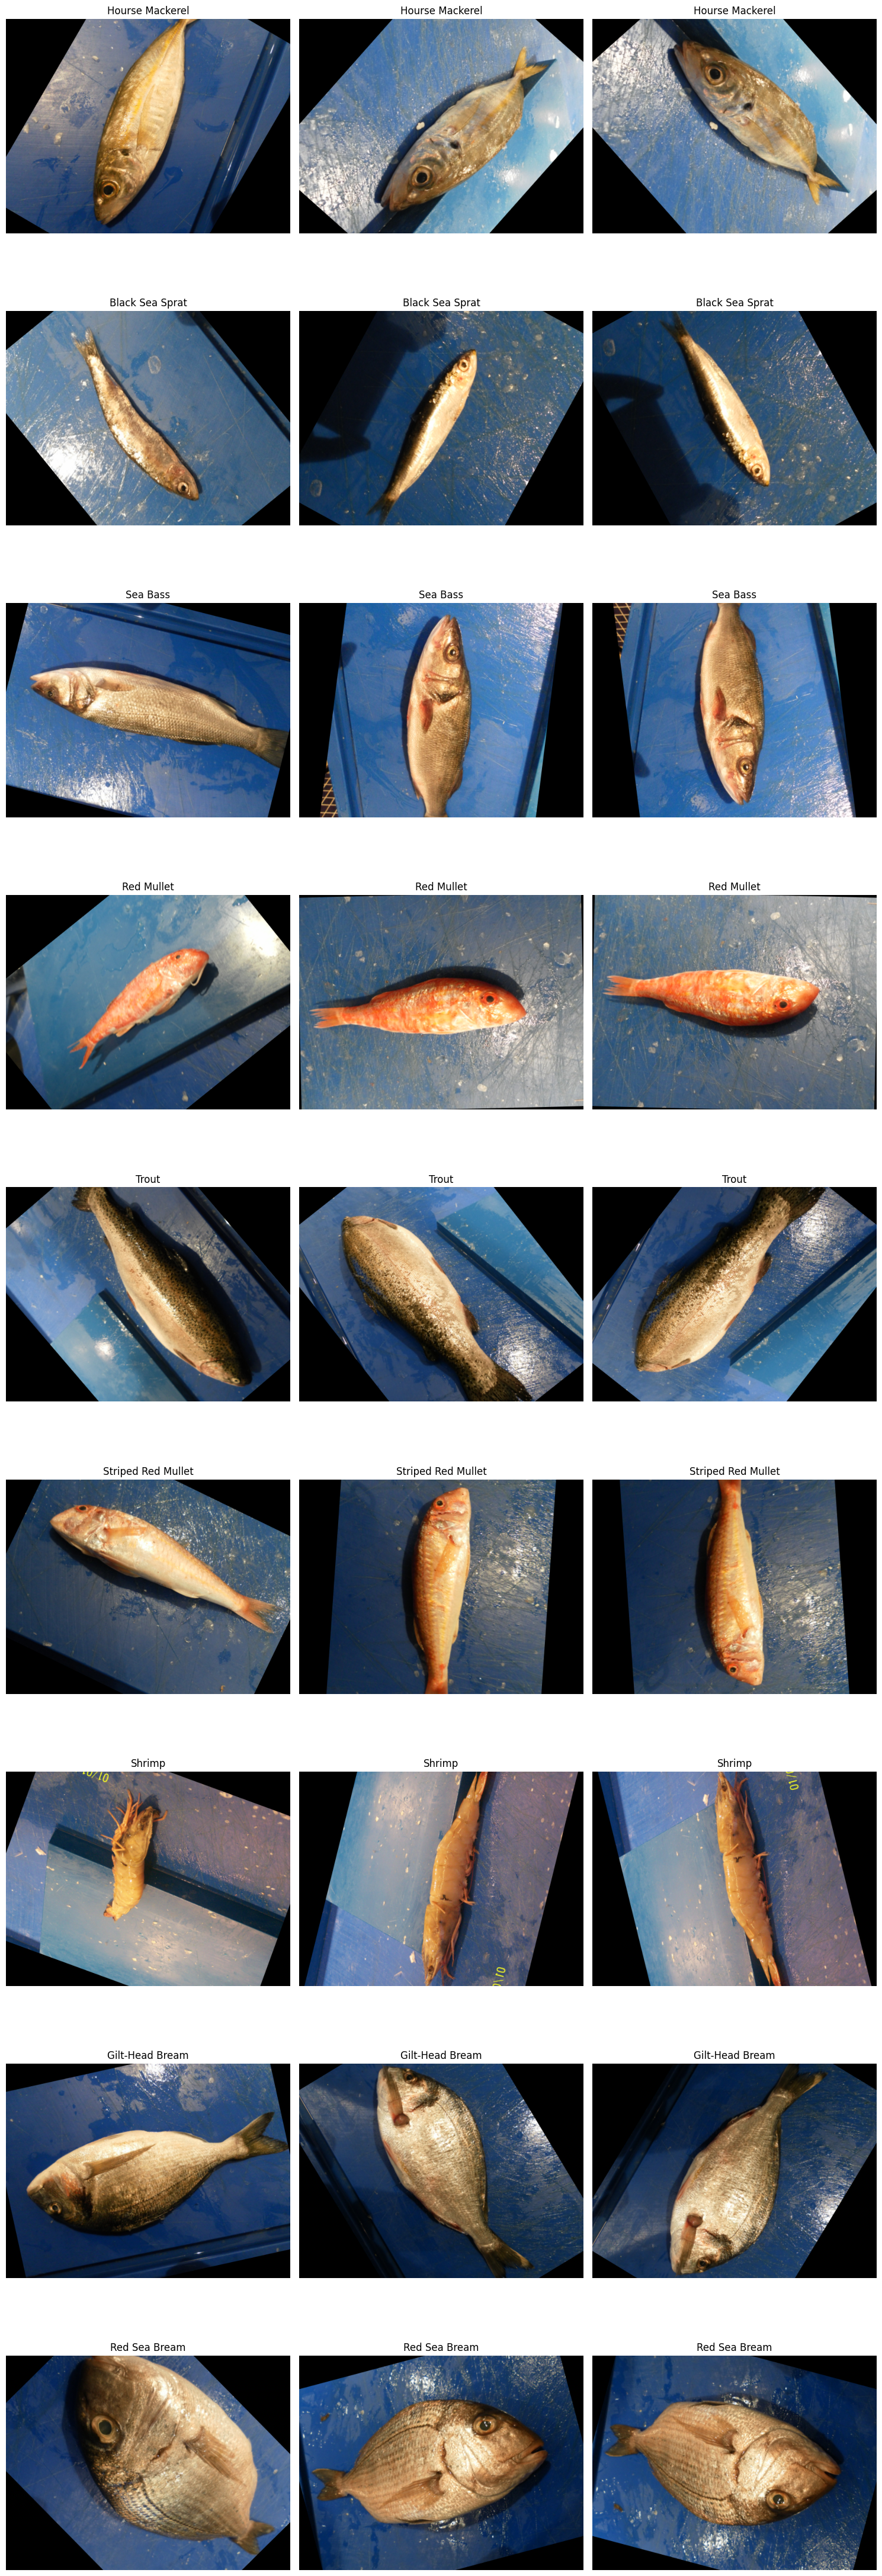

In [43]:
import cv2
import matplotlib.pyplot as plt


samples_per_class = 3


classes = data['label'].unique()


n_classes = len(classes)  
cols = samples_per_class
rows = n_classes  


fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  

for i, class_name in enumerate(classes):
    sample_images = data[data['label'] == class_name]['path'].sample(n=min(samples_per_class, len(data[data['label'] == class_name])), random_state=1)
    
    for j, img_path in enumerate(sample_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        axes[i * cols + j].imshow(img)
        axes[i * cols + j].set_title(class_name)
        axes[i * cols + j].axis('off')
    
  
    for j in range(len(sample_images), cols):
        axes[i * cols + j].axis('off')

plt.tight_layout()
plt.show()


**from tensorflow.keras.preprocessing import image:** Imports image processing tools from the Keras library.

**image_data = []:** Creates an empty list to store image data.

**for img_path in data['path']::** Iterates over each image path in the data DataFrame.

**img = image.load_img(img_path, target_size=(64, 64)):** Loads the image from the specified path and resizes it to a fixed size (64x64 pixels).

**img_array = image.img_to_array(img):** Converts the loaded image into a numerical array (numpy array).

**img_array = img_array / 255.0:** Normalizes pixel values to the range of 0-1. This helps the deep learning models perform better.

**img_array = img_array.flatten():** Flattens the image into a one-dimensional array. This makes it suitable for input into an artificial neural network (ANN).

**image_data = np.array(image_data):** Converts the list into a numpy array, preparing it for further processing and analysis.


In [44]:
from tensorflow.keras.preprocessing import image



image_data = []

for img_path in data['path']:
  
    img = image.load_img(img_path, target_size=(64, 64))  # Sabit boyut, örn: 64x64

   
    img_array = image.img_to_array(img)

   
    img_array = img_array / 255.0

 
    img_array = img_array.flatten()

    image_data.append(img_array)


image_data = np.array(image_data)


**from sklearn.preprocessing import LabelBinarizer:** Imports the LabelBinarizer class from the sklearn.preprocessing module, which is used for converting categorical labels into a one-hot encoded format.

**lb = LabelBinarizer():** Creates an instance of the LabelBinarizer class.

**labels_encoded = lb.fit_transform(data['label']):** Fits the LabelBinarizer to the labels in the data['label'] column and transforms them into a one-hot encoded format. Each unique label will be represented as a binary vector, where 1 indicates the presence of the label and 0 indicates its absence.

In [45]:
from sklearn.preprocessing import LabelBinarizer


lb = LabelBinarizer()
labels_encoded = lb.fit_transform(data['label'])


**from sklearn.model_selection import train_test_split:** Imports the train_test_split function from the sklearn.model_selection module. This function is used to split the dataset into training and testing subsets.

**image_data:** The input features (flattened images).

**labels_encoded:** The one-hot encoded labels.

**test_size=0.2:** Specifies that 20% of the dataset should be reserved for testing, while 80% will be used for training.

**random_state=42:** Sets a seed for the random number generator, ensuring that the split is reproducible. Using the same random state will yield the same split each time the code is run.

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_data, labels_encoded, test_size=0.2, random_state=42)


**import tensorflow as tf:** Imports the TensorFlow library for building and training the neural network.

**from sklearn.model_selection import train_test_split:** Imports the train_test_split function to split the dataset into training and testing sets.

**from tensorflow.keras.models import Sequential:** Imports the Sequential model type from Keras to create a linear stack of layers.

**from tensorflow.keras.layers import Dense, Input:** Imports the Dense and Input layers for building the neural network.
************************************************************************************************************************
**Splitting the Dataset**

**X_train, X_test, y_train, y_test = train_test_split(image_data, labels_encoded, test_size=0.2, random_state=42):** Splits the dataset into training (80%) and testing (20%) sets.
************************************************************************************************************************
**Creating the Model**

**model = Sequential():** Initializes a new sequential model.

**model.add(Input(shape=(64*64*3,))):** Adds the input layer, specifying the shape of the input data (flattened image size).

**model.add(Dense(128, activation='relu')):** Adds a dense (fully connected) layer with 128 neurons and ReLU activation function.

**model.add(Dense(64, activation='relu')):** Adds another dense layer with 64 neurons and ReLU activation function.

**model.add(Dense(len(lb.classes_), activation='softmax')):** Adds the output layer with a number of neurons equal to the number of classes, using the softmax activation function for multi-class classification.
***********************************************************************************************************************
**Compiling the Model**

**model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']):** Compiles the model with the Adam optimizer, categorical crossentropy loss function (suitable for multi-class classification), and tracks accuracy as a metric.
************************************************************************************************************************
**Training the Model**

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test)): Trains the model on the training data for 10 epochs and validates it on the testing data. The training history is stored in the history variable.
************************************************************************************************************************
**Printing Training Results**

A loop iterates through each epoch, printing the loss and accuracy metrics for both the training and validation sets:

**Loss function:** The loss value for the current epoch.

**Validation loss:** The validation loss for the current epoch.

**Accuracy:** The training accuracy for the current epoch.

**Validation accuracy:** The validation accuracy for the current epoch

In [47]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


X_train, X_test, y_train, y_test = train_test_split(image_data, labels_encoded, test_size=0.2, random_state=42)


model = Sequential()
model.add(Input(shape=(64*64*3,)))  # İlk katman input olarak tanımlanıyor
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(lb.classes_), activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


for epoch in range(len(history.history['loss'])):
    print(f"Epoch {epoch + 1}")
    print(f"Loss Function: {history.history['loss'][epoch]}")
    print(f"Validation Loss : {history.history['val_loss'][epoch]}")
    print(f"Accuracy: {history.history['accuracy'][epoch]}")
    print(f"Validation Accuracy: {history.history['val_accuracy'][epoch]}")
    print("-" * 50)


Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.3325 - loss: 1.9747 - val_accuracy: 0.5867 - val_loss: 1.1989
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6568 - loss: 1.0317 - val_accuracy: 0.7383 - val_loss: 0.7489
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7795 - loss: 0.6736 - val_accuracy: 0.8144 - val_loss: 0.5877
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8187 - loss: 0.5312 - val_accuracy: 0.7861 - val_loss: 0.6051
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8559 - loss: 0.4286 - val_accuracy: 0.8744 - val_loss: 0.4154
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8911 - loss: 0.3343 - val_accuracy: 0.8850 - val_loss: 0.3454
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8998 - loss: 0.3173 - val_accuracy: 0.8600 - val_loss: 0.3971
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9260 - loss: 0.2188 - val_accu

**Plotting Loss Values**

The training loss *(history.history['loss'])* is plotted against the number of epochs.

The validation loss *(history.history['val_loss'])* is also plotted for comparison.

Each plot is labeled accordingly.

The x-axis is labeled as "Epoch," while the y-axis is labeled as "Loss."

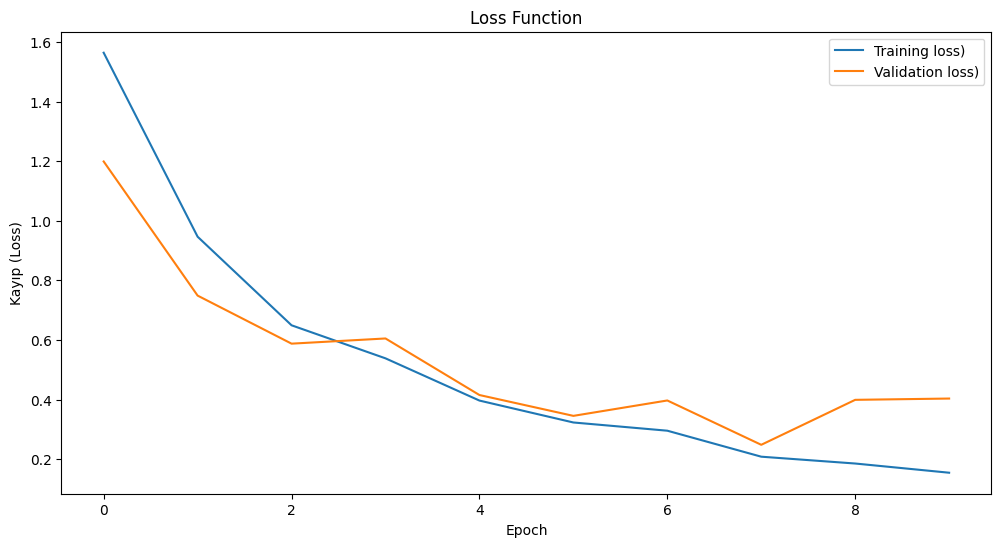

In [48]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss)')
plt.plot(history.history['val_loss'], label='Validation loss)')
plt.title('Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Kayıp (Loss)')
plt.legend()
plt.show()


In [49]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


**Obtaining Predictions**

**model.predict(X_test):** Retrieves the model's predictions for the samples in the test set.

**np.argmax(y_pred, axis=1):** Extracts the classes with the highest probabilities from the prediction results and assigns them to the variable y_pred_classes.
************************************************************************************************************************
**Getting True Classes**

**np.argmax(y_test, axis=1):** Obtains the true classes by retrieving the highest probability labels from the y_test array and assigns them to the variable y_true.

**Creating the Confusion Matrix**

**confusion_matrix(y_true, y_pred_classes):** Constructs a matrix that shows the confusion between the true and predicted classes.
************************************************************************************************************************
**Visualizing the Confusion Matrix**

**plt.figure(figsize=(10, 7)):** Creates a new figure for the plot.

**sns.heatmap(...):** Uses the Seaborn library to visualize the confusion matrix. annot=True displays the numbers in each cell, fmt='d' shows the values as integers, and cmap='Blues' sets the color palette to shades of blue. xticklabels and yticklabels define the labels for the axes.

**plt.title, plt.xlabel, plt.ylabel:** Sets the title and axis labels for the plot.

**plt.show():** Displays the plot.
************************************************************************************************************************
**Generating the Classification Report**

**classification_report(...):** Creates a report that shows the performance metrics (accuracy, precision, recall, F1 score) for the true and predicted classes.




57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


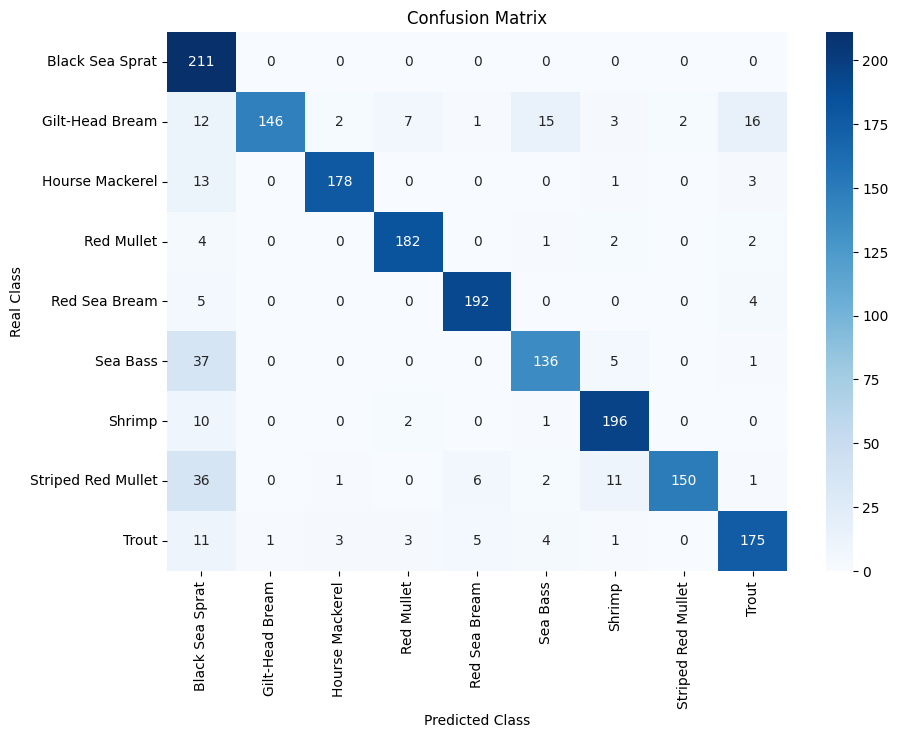

Classification Report:
                     precision    recall  f1-score   support

   Black Sea Sprat       0.62      1.00      0.77       211
   Gilt-Head Bream       0.99      0.72      0.83       204
   Hourse Mackerel       0.97      0.91      0.94       195
        Red Mullet       0.94      0.95      0.95       191
     Red Sea Bream       0.94      0.96      0.95       201
          Sea Bass       0.86      0.76      0.80       179
            Shrimp       0.89      0.94      0.92       209
Striped Red Mullet       0.99      0.72      0.84       207
             Trout       0.87      0.86      0.86       203

          accuracy                           0.87      1800
         macro avg       0.90      0.87      0.87      1800
      weighted avg       0.90      0.87      0.87      1800



In [50]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  

y_true = np.argmax(y_test, axis=1)


cm = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()


report = classification_report(y_true, y_pred_classes, target_names=lb.classes_)
print("Classification Report:\n", report)


**Model Creation Function**

The function create_model(dropout_rate=0.2) initializes a sequential neural network model.

**Input(shape=(X_train.shape[1],)):** Adds an input layer that matches the number of features in the training data.

**Dense(128, activation='relu'):** Adds a fully connected layer with 128 neurons and ReLU activation.

**Dropout(dropout_rate):** Applies dropout with the specified rate to randomly set a fraction of the input units to 0 during training, helping to prevent overfitting.

**Dense(64, activation='relu'):** Adds another fully connected layer with 64 neurons.

**Another Dropout(dropout_rate):** Applies dropout again to further mitigate overfitting.

**Dense(9, activation='softmax'):** Adds the output layer with 9 neurons (one for each class) and softmax activation to output class probabilities.

The model is compiled with the Adam optimizer and categorical cross-entropy loss.
************************************************************************************************************************
**Training with Different Dropout Rates**

**dropout_rates = [0.2, 0.3, 0.4]:** Specifies different dropout rates to be tested.

**histories = []:** Initializes an empty list to store training histories.

Calls create_model(dropout_rate=rate) to create a new model with the current dropout rate.

Trains the model using model.fit(...), specifying validation data and training for 20 epochs.

Appends the dropout rate and training history to the histories list.
************************************************************************************************************************
**Visualization of Validation Loss**

**import matplotlib.pyplot as plt:** Imports the Matplotlib library for plotting.

The second for loop iterates through the stored histories and plots the validation loss for each dropout rate.

**plt.plot(...):** Plots the validation loss for each dropout rate.

Sets the plot title, labels, and legend to clarify the results.

Finally, *plt.show()* displays the plot.

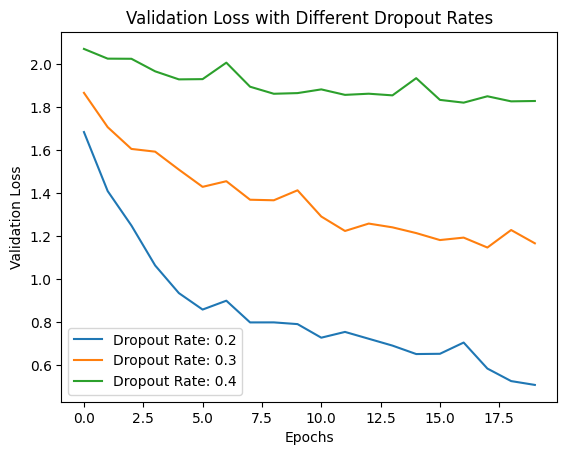

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input


def create_model(dropout_rate=0.2):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(9, activation='softmax')) 
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


dropout_rates = [0.2, 0.3, 0.4]
histories = []

for rate in dropout_rates:
    model = create_model(dropout_rate=rate)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, verbose=0)
    histories.append((rate, history))


import matplotlib.pyplot as plt

for rate, history in histories:
    plt.plot(history.history['val_loss'], label=f'Dropout Rate: {rate}')
    
plt.title('Validation Loss with Different Dropout Rates')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()
